# COSC 4610/5610 Project 3 (fall 2023)

**Team Members**: Clare Fitzgerald and Daniel Quiles

**Emails**: Clare.fitzgerald@marquette.edu Daniel.quiles@marquette.edu


**Submission.** Please insert your names and emails above, save your code in this notebook, and explain what you are doing along with your findings in text cells. You can think of it as a technical report with code. Before submission, please use `Kernel -> Restart & Run All` in the Jupyter menu to verify your code is runnable and save all outputs. Afterwards, you can upload your raw notebook to D2L. 

**DUE NOV 21 11:59PM**

In this project, we will apply the methods for  model evaluation and validation. You can work individually or in a two-person team.

## Set up the environment

You may need a Python visualization library, such as matplotlib, for generating the figures. Here are some examples for matplotlib https://matplotlib.org/1.2.1/examples/pylab_examples/errorbar_demo.html

Use `pip3 install matplotlib` to install the library.

Sample code for drawing figures:

Text(0.5, 1.0, 'Sample curve with error bars')

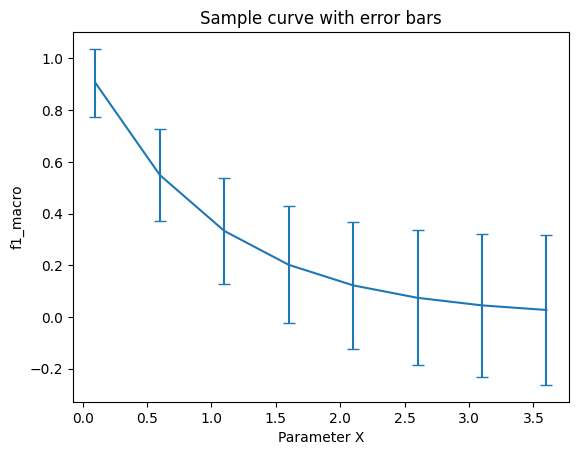

In [1]:
import sklearn as sk
import numpy as np
import os,sys
import matplotlib.pyplot as plt

# example code for plotting curves with error bars
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

# add some arbitrarily generated fake y error bars
yerr = 0.1 + 0.1*np.sqrt(x)

plt.figure()
#plt.plot(x, y)
plt.errorbar(x, y, yerr=yerr, capsize=4)
plt.xlabel ("Parameter X")
plt.ylabel ("f1_macro")
plt.title('Sample curve with error bars')


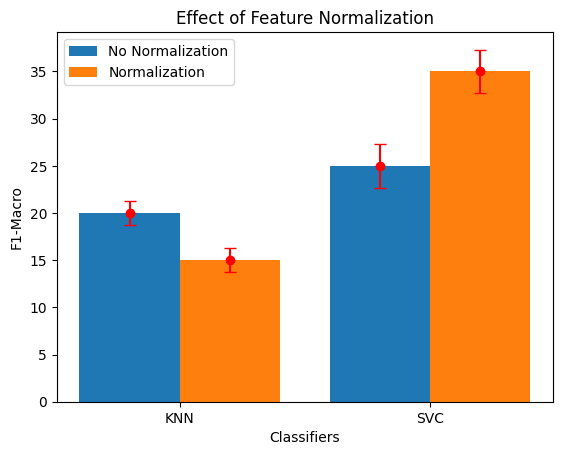

In [2]:
# sample code plotting a bar graph with error bars

import matplotlib.pyplot as plt
import numpy as np

X = ['KNN','SVC']
orig_mean = [20,25]
normalized_mean = [15,35]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, orig_mean, 0.4, label = 'No Normalization')
plt.bar(X_axis + 0.2, normalized_mean, 0.4, label = 'Normalization')

yerr_orig = [1.3, 2.3]
yerr_norm = [1.3, 2.3]


plt.errorbar(
    X_axis-0.2,
    orig_mean,
    yerr = yerr_orig,
    fmt="o",
    capsize=4,
    color='red'
)

plt.errorbar(
    X_axis + 0.2,
    normalized_mean,
    yerr = yerr_norm,
    fmt="o",
    capsize=4,
    color='red'
)

plt.xticks(X_axis, X)
plt.xlabel("Classifiers")
plt.ylabel("F1-Macro")
plt.title("Effect of Feature Normalization")
plt.legend()
plt.show()


## Your tasks

We will be using the datasets generated from Project 2 for the following tasks. If your generated datasets from Project 2 are not ideal, you may use the provided datasets https://www.cs.mu.edu/~keke/dm/textmining/data.zip that gave f1-macro around 0.7 for multinomial naive Bayes classifiers. We will be using the **TFIDF** training data only.

### Task 1: find the best classifier for mini_newsgroup data

We will try to find the best performing classifier among the following algorithms for the TFIDF training data: Multinominal Naive Bayes, Bernoulli Naive Bayes, k Nearest Neighbor (kNN), and SVM. SVM were not discussed in the class, but it's easy to use them. The corresponding usages are as follows. Note the classifiers in the sklearn library share the same pattern: you create a classifier (e.g., clf in the following) first and then train it with the "fit" founction.

The usage of Multinominal NB:
```python
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
```
The usage of Bernoulli NB:
```python
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
```
The usage of [kNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html):
```python
from sklearn.neighbors  import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 5)
```
The usage of SVM:
```python
from sklearn.svm  import SVC
clf = SVC()
```
You can check the corresponding links to the sklearn documentation pages for the parameters. Since the time or sequential factor of the newsgroup data is not applied, we can use cross-validation that randomly shuffles and splits data into folds. **Note that it's important to use the same split folds for different experiments to make their results comparable.** The following code snippet shows how to generate the folds and use the cross-validation library function in evaluation.
```python
from sklearn.model_selection import cross_val_score, KFold
from sklearn.datasets import load_svmlight_file

feature_vectors, targets = load_svmlight_file(training_filename)
clf1 = MultinomialNB()
clf2 = BernoulliNB()

# shuffled and then split
kfolds = KFold(n_splits=5, shuffle=True, random_state=1234) # generate the fixed folds. You may call this once and use kfolds everywhere

#use kfolds for different classifiers
scores1 = cross_val_score(clf1, feature_vectors, targets, cv=kfolds, scoring='f1_macro')
print(scores.mean(), scores.std()*1.96/sqrt(5)))
scores2 = cross_val_score(clf2, feature_vectors, targets, cv=kfolds, scoring='f1_macro')

```

This example uses two classifers, 5-fold cross-validation (with a split generated with KFold) and the metric is f1_macro, which is the macro-averaging of the F1 scores for different classes (check the lecture slides for the detail). "scores" is a list, containing the evaluation result of the five folds. You can use np.mean and np.std of scores to compute the confidence intervals (check the slides for the definition). Then, you can finish the following subtasks.


In [3]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.datasets import load_svmlight_file
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.svm  import SVC
import math
feature_vectors, targets = load_svmlight_file('train.TFIDF')
clfMultiNB = MultinomialNB()
clfBernNB = BernoulliNB()
clfKNN = KNeighborsClassifier(n_neighbors = 5)
clfSVC = SVC()
# shuffled and then split
kfolds = KFold(n_splits=5, shuffle=True, random_state=1234) # generate the fixed folds. You may call this once and use kfolds everywhere

#use kfolds for different classifiers
scoresMultiNB = cross_val_score(clfMultiNB, feature_vectors, targets, cv=kfolds, scoring='f1_macro')
print(scoresMultiNB.mean(), scoresMultiNB.std()*1.96/math.sqrt(5))
scoresBernNB = cross_val_score(clfBernNB, feature_vectors, targets, cv=kfolds, scoring='f1_macro')
print(scoresBernNB.mean(), scoresBernNB.std()*1.96/math.sqrt(5))
scoresKNN = cross_val_score(clfKNN, feature_vectors, targets, cv=kfolds, scoring='f1_macro')
print(scoresKNN.mean(), scoresKNN.std()*1.96/math.sqrt(5))
scoresSVC = cross_val_score(clfSVC, feature_vectors, targets, cv=kfolds, scoring='f1_macro')
print(scoresSVC.mean(), scoresSVC.std()*1.96/math.sqrt(5))

0.8011627902109325 0.02158574939070947
0.5155072108625433 0.0337308963392531
0.29268258280990267 0.04121506238215353
0.32471895873655315 0.07371285038129433


#### Task 1.1 effect of feature normalization on kNN and SVC classifiers
kNN and SVC classifiers depend on the concept of record similarity (distance). Thus, feature normalization might affect the modeling result. In this task, we will apply the feature normalization method: max-min normalization, to find out whether the normalization will affect the classifier performance. For this sparse dataset loaded with load_svmlight_file, you may try [sklearn.preprocessing.MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html#sklearn.preprocessing.MaxAbsScaler) to simplify your work. The usage example:
```python
from sklearn.preprocessing import MaxAbsScaler
transformer = MaxAbsScaler().fit(feature_vectors)
X_new = transformer.transform(feature_vectors)

# use X_new for training
scores_new = cross_val_score(clf, X_new, targets, cv=cv, scoring='f1_macro')
```
Compare the results with and without normalization for kNN and SVC classifiers (a bar graph will be good; try one n_neighbors setting, e.g., 5, for kNN). Answer whether the difference is *statistically significant*, with the t-test in the slides and HW4. If you see normalization helps, use the normalized data for tasks 1.2-1.3


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats

from sklearn.preprocessing import MaxAbsScaler
transformer = MaxAbsScaler().fit(feature_vectors)
X_new = transformer.transform(feature_vectors)

NormalizedKNN = cross_val_score(clfKNN, X_new, targets, cv=kfolds, scoring='f1_macro')
NormalizedSVC= cross_val_score(clfSVC, X_new, targets, cv=kfolds, scoring='f1_macro')
print(NormalizedKNN)
print(NormalizedSVC)
print(NormalizedKNN.mean(), NormalizedKNN.std()*1.96/math.sqrt(5))
print(NormalizedSVC.mean(), NormalizedSVC.std()*1.96/math.sqrt(5))

[0.11415646 0.10229697 0.13536349 0.10719949 0.11133223]
[0.43121716 0.41980368 0.43613051 0.43900516 0.41743653]
0.11406972585653585 0.009968858549297738
0.4287186091676044 0.007578420517858309


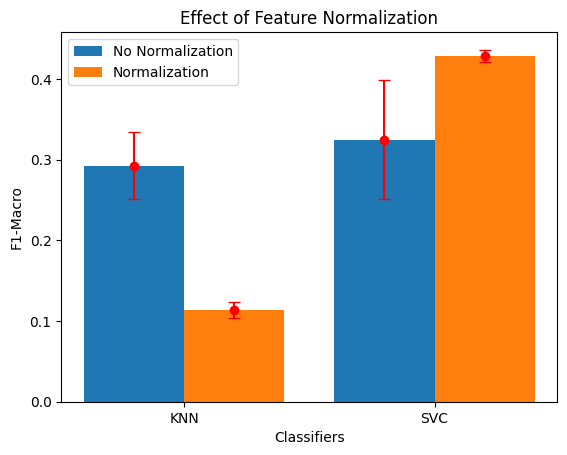

In [5]:
X = ["KNN","SVC"]
clfKNN = KNeighborsClassifier(n_neighbors = 5)
orig_mean = [stats.mean(scoresKNN), stats.mean(scoresSVC)]
normalized_mean = [stats.mean(NormalizedKNN), stats.mean(NormalizedSVC)]
  
# sample code plotting a bar graph with error bars

import matplotlib.pyplot as plt
import numpy as np

X = ['KNN','SVC']
orig_mean = [stats.mean(scoresKNN),stats.mean(scoresSVC)]
normalized_mean = [stats.mean(NormalizedKNN), stats.mean(NormalizedSVC) ]
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, orig_mean, 0.4, label = 'No Normalization')
plt.bar(X_axis + 0.2, normalized_mean, 0.4, label = 'Normalization')

yerr_orig = [0.04121506238215353,  0.07371285038129433] #Values from printing out previous
yerr_norm = [.009968858549297738, .007578420517858309]


plt.errorbar(
    X_axis-0.2,
    orig_mean,
    yerr = yerr_orig,
    fmt="o",
    capsize=4,
    color='red'
)

plt.errorbar(
    X_axis + 0.2,
    normalized_mean,
    yerr = yerr_norm,
    fmt="o",
    capsize=4,
    color='red'
)

plt.xticks(X_axis, X)
plt.xlabel("Classifiers")
plt.ylabel("F1-Macro")
plt.title("Effect of Feature Normalization")
plt.legend()
plt.show()


Comparing the results: For the KNN and SVC data, normalization lowered the mean F1 Macro scores as well as made the confidence interval smaller. Normalization had a statistically significant effect on the data as shown by the error bars not overlapping between the no normalization and the normalization confidence intervals.
Since we want a higher mean F1-Macro score, normalization should be used for SVC, but not KNN.


#### Task 1.2 parameter tuning for kNN
kNN classifier follows the simple idea: put the new unknown record X in the training data. If the majority of k nearest neighbors (defined by record similarity, e.g., Euclidean distance) of an unknown new record have a certain class C, then this record's class label is also C. While the classifier is so simple (even without the need to train a model), you still need to determine the optimal model parameter setting for the parameter: n_neighbors. Let's consider the range of n_neighbors from 1 to 20 (or a larger range you want to try). Write the code to get the model performance at each n_neighbors setting. Plot the curve of kNN classifier performance (x-axis: n_neighbors, y-axis: f1_macro, check the above curve sample code), where each data point includes the mean of cross-validation result and its confidence interval.)


In [6]:
K_neighbors = []
yerr = []
feature_vectors, targets = load_svmlight_file('train.TFIDF')
for i in range (1, 21):
    clfKNN = KNeighborsClassifier(n_neighbors = i)
    scoresKNN = cross_val_score(clfKNN, feature_vectors, targets, cv=kfolds, scoring='f1_macro')
    K_neighbors.append(scoresKNN.mean())
    yerr.append(scoresKNN.std()*1.96/math.sqrt(5))
print(K_neighbors)
print(scoresKNN.mean(), scoresKNN.std()*1.96/math.sqrt(5))

[0.35637222979465044, 0.3258726885691061, 0.34142772365602003, 0.29454284338665393, 0.29268258280990267, 0.2828193565289643, 0.2956050236714073, 0.3087606358156514, 0.2990439845353439, 0.27947851298408655, 0.2834343447447307, 0.26301410466494557, 0.24465456041033762, 0.25217755049007795, 0.2703809332649382, 0.2634429326142912, 0.26239632494256154, 0.25217188362185716, 0.25762378169713546, 0.23264552005114175]
0.23264552005114175 0.06172152161545333


[0.35637222979465044, 0.3258726885691061, 0.34142772365602003, 0.29454284338665393, 0.29268258280990267, 0.2828193565289643, 0.2956050236714073, 0.3087606358156514, 0.2990439845353439, 0.27947851298408655, 0.2834343447447307, 0.26301410466494557, 0.24465456041033762, 0.25217755049007795, 0.2703809332649382, 0.2634429326142912, 0.26239632494256154, 0.25217188362185716, 0.25762378169713546, 0.23264552005114175]
0.23264552005114175 0.06172152161545333


Text(0.5, 1.0, 'K neighbors')

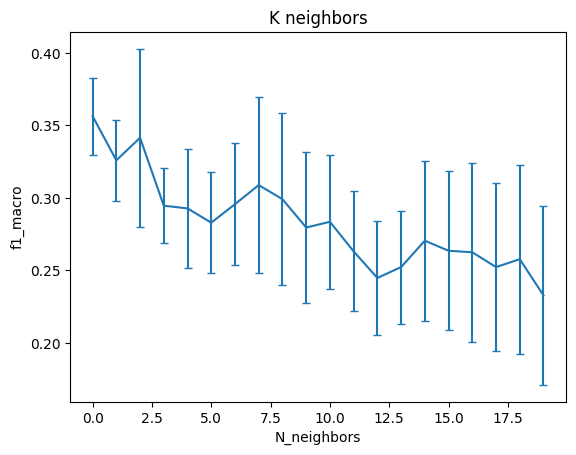

In [7]:
print(K_neighbors)
print(scoresKNN.mean(), scoresKNN.std()*1.96/math.sqrt(5))

y = K_neighbors #Cross Validation result
x = np.arange(len(K_neighbors))

plt.figure()
#plt.plot(x, y)
plt.errorbar(x, y, yerr=yerr, capsize=3)
plt.xlabel ("N_neighbors")
plt.ylabel ("f1_macro")
plt.title('K neighbors')

This displays the not normalized KNN data and how the value of k affects it. This is the result of the loop from the previous block displayed as a line graph.

## Code for Normalized KNN, but unused because in Task 1.1, we saw that the unnormalized data performed with a lower mean f1-macro.

#### Task 1.3 feature selection for naive Bayes classifiers

Feature (term) selection may affect the performance of multinomial NB and multivariate Bernoulli NB (and other classifiers -- if you want to check them as well). We will evaluate the two commonly used feature selection methods: the chi-squared method and the mutual information method, to find out how they perform for the newsgroup dataset. The following example shows how to use the library functions in sklearn.
``` python
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif
feature_vectors, targets = load_svmlight_file(training_filename)
X = feature_vectors
y = targets
X_new1 = SelectKBest(chi2, k=100).fit_transform(X, y)
X_new2 = SelectKBest(mutual_info_classif, k=100).fit_transform(X, y)
```
k=100 here means the top 100 features that will be returned to the X_new feature vectors according to the feature selection method ("chi2" or "mutual_info_classif"). X_new, together with y, can then be used in cross-validation to find out how models perform with the top-k features. For example,

```python
mn_clf = MultinomialNB()
scores = cross_val_score(mn_clf, X_new1, y, cv=cv, scoring='f1_macro')
```

The selection of k depends on the actual number of features available. For this dataset, k can be in the range from a few hundred to a few thousand - let's try a few typical values for k: 100, 200, 500, 1000, 2000, 3000 (you are free to explore more k settings to locate the best k precisely). Write the code to find the model performance for both classifiers at k settings and plot the figures of (x-axis: K, y-axis:f1_macro): one figure for chi2, another for mutual_info_classif. Discuss what you have observed and which feature selection method and the setting of k gives the best result.


In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif
import warnings
warnings.filterwarnings("ignore")
feature_vectors, targets = load_svmlight_file("train.TFIDF")
kval = [100,200,500,1000,2000,3000]

mnb_chi2 = []
mnb_mic = []
chi2_ste = []
mic_ste=[]
mn_clf = MultinomialNB()
for kv in kval:
    X_new1 = X_new1 = SelectKBest(chi2, k=kv).fit_transform(feature_vectors, targets)
    scores = cross_val_score(mn_clf, X_new1, targets, cv=5, scoring='f1_macro')
    mnb_chi2.append(scores.mean())
    chi2_ste.append(scores.std()*1.96/math.sqrt(5))
    X_new2 = SelectKBest(mutual_info_classif, k=kv).fit_transform(feature_vectors, targets)
    scores2 = cross_val_score(mn_clf, X_new2, targets, cv=5, scoring='f1_macro')
    mnb_mic.append(scores2.mean())
    mic_ste.append(scores2.std()*1.96/math.sqrt(5))
    

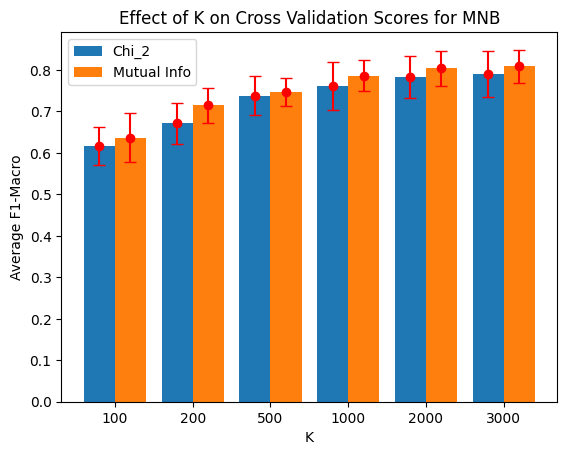

In [10]:
#Displaying the data for Multinomial NB
import matplotlib.pyplot as plt
import numpy as np

X = [100, 200, 500, 1000, 2000, 3000]
X_axis = np.arange(len(mnb_chi2))
  
plt.bar(X_axis - 0.2, mnb_chi2, 0.4, label = 'Chi_2')
plt.bar(X_axis + 0.2, mnb_mic, 0.4, label = 'Mutual Info')

plt.errorbar(
    X_axis-0.2,
    mnb_chi2,
    yerr = chi2_ste,
    fmt="o",
    capsize=4,
    color='red'
)

plt.errorbar(
    X_axis + 0.2,
    mnb_mic,
    yerr = mic_ste,
    fmt="o",
    capsize=4,
    color='red'
)

plt.xticks(X_axis, X)
plt.xlabel("K")
plt.ylabel("Average F1-Macro")
plt.title("Effect of K on Cross Validation Scores for MNB")
plt.legend()
plt.show()
#Best setting: k= 3000

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif
import warnings
warnings.filterwarnings("ignore")
feature_vectors, targets = load_svmlight_file("train.TFIDF")
kval = [100,200,500,1000,2000,3000]

Bern_chi2 = []
Bern_mic = []
chi2_ste = []
mic_ste=[]
Bern_clf = BernoulliNB()
for kv in kval:
    X_new1 = X_new1 = SelectKBest(chi2, k=kv).fit_transform(feature_vectors, targets)
    scores = cross_val_score(Bern_clf, X_new1, targets, cv=5, scoring='f1_macro')
    Bern_chi2.append(scores.mean())
    chi2_ste.append(scores.std()*1.96/math.sqrt(5))
    X_new2 = SelectKBest(mutual_info_classif, k=kv).fit_transform(feature_vectors, targets)
    scores2 = cross_val_score(Bern_clf, X_new2, targets, cv=5, scoring='f1_macro')
    Bern_mic.append(scores2.mean())
    mic_ste.append(scores2.std()*1.96/math.sqrt(5))

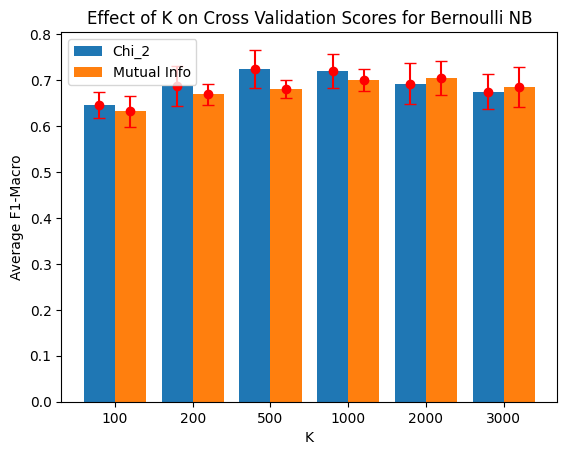

In [12]:
#Displaying the data for Bernoulli NB
import matplotlib.pyplot as plt
import numpy as np

X = [100, 200, 500, 1000, 2000, 3000]
X_axis = np.arange(len(Bern_chi2))
  
plt.bar(X_axis - 0.2, Bern_chi2, 0.4, label = 'Chi_2')
plt.bar(X_axis + 0.2, Bern_mic, 0.4, label = 'Mutual Info')

plt.errorbar(
    X_axis-0.2,
    Bern_chi2,
    yerr = chi2_ste,
    fmt="o",
    capsize=4,
    color='red'
)

plt.errorbar(
    X_axis + 0.2,
    Bern_mic,
    yerr = mic_ste,
    fmt="o",
    capsize=4,
    color='red'
)

plt.xticks(X_axis, X)
plt.xlabel("K")
plt.ylabel("Average F1-Macro")
plt.title("Effect of K on Cross Validation Scores for Bernoulli NB")
plt.legend()
plt.show()
#Best setting: k= 3000

#### Task 1.4 best classifier
Please report the k-fold CV mean and its confidence interval for each classifier (with the best setting you can get so far). You may organize them in a bar graph or a table. For the top two performing (the best two means), apply t-test to check their difference. Summarize what you observed.

#### Best setting for each classifier
Multinomial NB: best k = 3000, Mutual Info
Bernoulli NB: best k = 500, Chi square
KNN: Not Normalized
SVC: Normalized

In [13]:
#Best Multinomial Naive Bayes, k=3000 Mutual Info 
feature_vectors, targets = load_svmlight_file('train.TFIDF')
kfolds = KFold(n_splits=5, shuffle=True, random_state=1234)

mn_clf = MultinomialNB()
X_MNB = SelectKBest(mutual_info_classif, k=3000).fit_transform(feature_vectors, targets)
scoresMNB = cross_val_score(mn_clf, X_MNB, targets, cv=5, scoring='f1_macro')
MNB_mic = scoresMNB.mean()
MNB_ste = scoresMNB.std()*1.96/math.sqrt(5)
#Best Bernoulli Naive Bayes, k= 500 Chi Square 

Bern_clf = BernoulliNB()
X_BNB = SelectKBest(chi2, k=500).fit_transform(feature_vectors, targets)
scoresBNB = cross_val_score(Bern_clf, X_BNB, targets, cv=5, scoring='f1_macro')
BNB_chi2 = scoresBNB.mean()
BNB_ste = scoresBNB.std()*1.96/math.sqrt(5)
  
# Best KNN, Not normalized
scoresKNN = cross_val_score(clfKNN, feature_vectors, targets, cv=kfolds, scoring='f1_macro')
KNN_original = stats.mean(scoresKNN)
KNN_ste = scoresKNN.std()*1.96/math.sqrt(5)

#Best SVC, normalized
from sklearn.preprocessing import MaxAbsScaler
transformer = MaxAbsScaler().fit(feature_vectors)
X_new = transformer.transform(feature_vectors)
scoresSVC = cross_val_score(clfSVC, X_new, targets, cv=kfolds, scoring='f1_macro')
SVC_normalized = stats.mean(scoresSVC)
SVC_ste = scoresSVC.std()*1.96/math.sqrt(5)

all_means = [MNB_mic, BNB_chi2, KNN_original, SVC_normalized]
yerr = [MNB_ste, BNB_ste, KNN_ste, SVC_ste]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


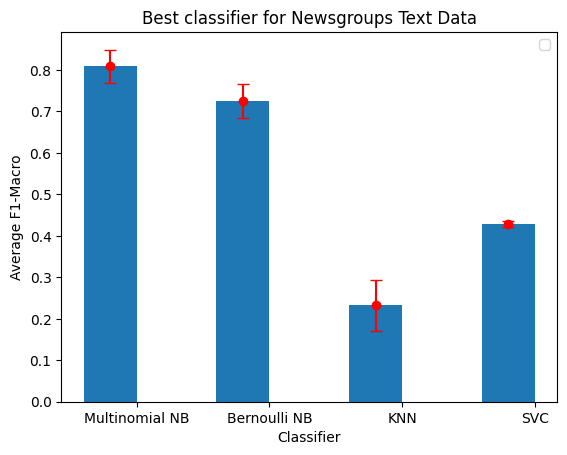

In [14]:
all_means = [MNB_mic, BNB_chi2, KNN_original, SVC_normalized]
yerr = [MNB_ste, BNB_ste, KNN_ste, SVC_ste]
X_axis = np.arange(len(all_means))
labels = ['Multinomial NB', 'Bernoulli NB', 'KNN', 'SVC']
plt.bar(X_axis - 0.2, all_means, 0.4, label = None)

plt.errorbar(
    X_axis-0.2,
    all_means,
    yerr = yerr,
    fmt="o",
    capsize=4,
    color='red'
)


plt.xticks(X_axis, labels)
plt.xlabel("Classifier")
plt.ylabel("Average F1-Macro")
plt.title("Best classifier for Newsgroups Text Data")
plt.legend()
plt.show()

In [15]:
#T-test for Multinomial NB and Bernoulli NB since they were the top two classifiers
from scipy.stats import ttest_ind

tstats, pvalue = ttest_ind(scoresMNB, scoresBNB)
print("T-stats: ", tstats)
print("\nP-value: ", pvalue)

T-stats:  2.5522809135844584

P-value:  0.03405356676489687


#### The best classifier was the Multinomial Naive Bayes with k=3000 and using the mutual info selection. Since the P-value between the Multinomial NB and the Bernoulli NB was 0.034 and less than .05, this indicates that there is a significant difference between the two. Since the F1-Macro for Multinomial NB was proven to be significantly higher, it is the best classifier for the mini_newsgroups data.

### Task 2: validating document clustering methods

We will experiment with two clustering algorithms: kMeans and hierarchical clustering. Suggestion: you may use the best feature selection method (and the best k) in Task 1.4 to reduce the data to a smaller set of features for faster evaluation of clustering methods. The following example shows the usages of kMeans and hierarchical clustering.
```python
from sklearn.cluster import KMeans, AgglomerativeClustering
feature_vectors, class_labels = load_svmlight_file(training_filename)
kmeans_model = KMeans(n_clusters=20).fit(feature_vectors)
single_linkage_model = AgglomerativeClustering(
        n_clusters=20, linkage='ward').fit(feature_vectors)
```
The hierarchical clustering algorithm uses the agglomerative style (bottom-up) and one of the three linkage methods (ward, complete, average) for computing cluster distances. You will finish the following subtasks.


#### Task 2.1 Normalize vector length
Note that kMeans only works on Euclidean distance, and the default distance for AgglomerativeClustering is also Euclidean distance. However, as we have discussed in class, Euclidean distance is not ideal for document similarity, and cosine similarity is a more appropriate one. Note that cosine similarity is equivalent to the Euclidean distance on normalized-length (vector length = 1) document vectors. Thus, we can still use kMeans and Agglomerative clustering for documents with normalized-length vectors to achieve the same effect of using cosine similarity.

Your task is to design the code to transform the feature vectors with length normalization. Specifically, for feature vectors X loaded from the libsvm format file, each row vector is a document vector. What you need to do is to iterate over the rows and convert each row r by applying the length normalization formula: r' = r/scipy.sparse.linalg.norm(r) (for sparse matrix read from libsvm file). Remember to use the normalized data for the next tasks.


In [69]:
# Task 2.1
import numpy as np
import scipy as sp
from sklearn.cluster import KMeans, AgglomerativeClustering
feature_vectors, class_labels = load_svmlight_file("train.TFIDF") 
feature_vectors = X_MNB #Using the x values from the Multinomial Naive Bayes classifier
num_documents, num_features = feature_vectors.shape

for i in range(num_documents):
    row_vector = feature_vectors[i, :]
    r = np.linalg.norm(row_vector) #Using the Multinomial Naive Bayes instead of the matrix read from the file
    feature_vectors[i, :] = r

kmeans_model = KMeans(n_clusters=20).fit(feature_vectors)
single_linkage_model = AgglomerativeClustering(n_clusters=20, linkage='ward').fit(feature_vectors)


In [ ]:
The above code iterates through the document vectors to individually normalize the length. I used the X_MNB as the feature vectors which holds the result of the best classifier found in Task 1. After iterating through the list, feature_vectors holds the all of the normalized vector rows. 

#### Task 2.2
You will use the length-normalized data to find out the best number of clusters for each clustering method. Try a range of n_clusters (the number of clusters), e.g., [2, 20] for each clustering algorithm and evaluate each one's clustering quality with the Silhouette Coefficient (SC) and Normalized Mutual Information (NMI) measures. SC does not depend on the existing class labels, while NMI does. The following example shows the usage, where "classification_labels" are the labels (the y list) used in earlier classification modeling tasks. The sample code is:

```python
from sklearn.cluster import KMeans
from sklearn import metrics
sc = []
nmi = []
for n in range(2, 21):
    kmeans_model = KMeans(n_clusters=n).fit(normalizedX)
    clustering_labels = kmeans_model.labels_
    sc.append( metrics.silhouette_score(normalizedX, clustering_labels, metric='euclidean'))
    nmi.append( metrics.normalized_mutual_info_score(classification_labels, clustering_labels))
```
Plot the figure of (x-axis: K, y-axis: the measure) for each quality measure. Each figure should contain the curves for the two clustering methods, respectively. Describe the meaning of each quality measure and discuss what you have observed. 

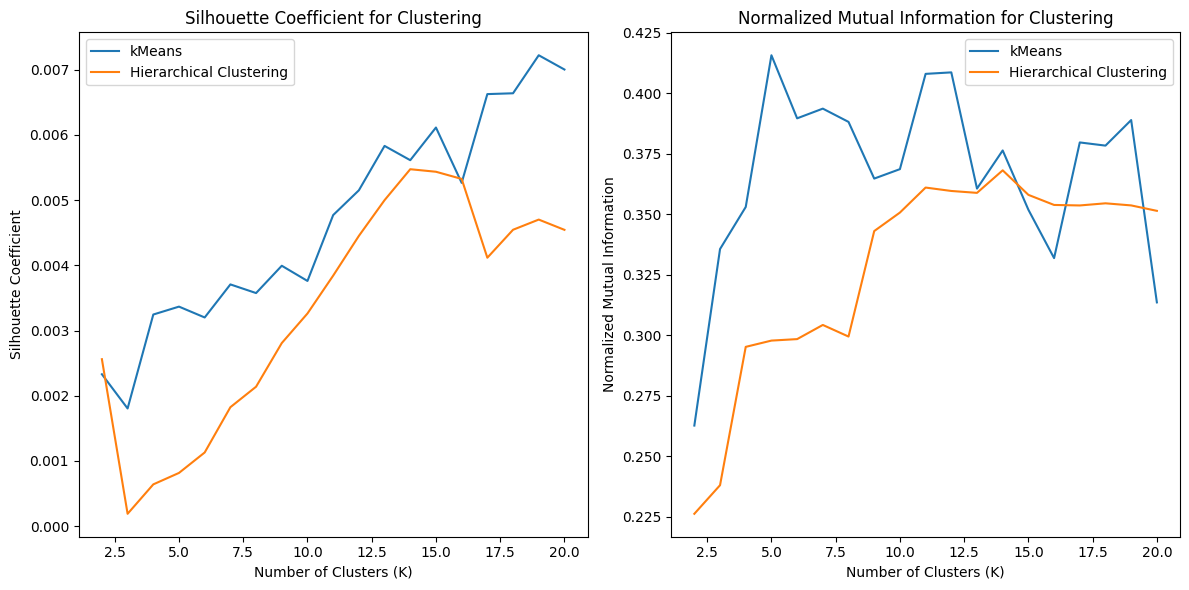

In [72]:
#Variable names
#kmeans_model
#single_linkage_model
#feature_vectors

from sklearn.cluster import KMeans
from sklearn import metrics
scs = []
nmis = []
sch = []
nmih = []
for n in range(2, 21):
    kmeans_model = KMeans(n_clusters=n).fit(feature_vectors)
    clustering_labels = kmeans_model.labels_
    sc.append( metrics.silhouette_score(feature_vectors, clustering_labels, metric='euclidean'))
    nmi.append( metrics.normalized_mutual_info_score(class_labels, clustering_labels))

    # Hierarchical Clustering (Agglomerative)
    hierarchical_model = AgglomerativeClustering(n_clusters=n, linkage='ward').fit(feature_vectors)
    clustering_labels_hierarchical = hierarchical_model.labels_
    sch.append(metrics.silhouette_score(normalizedX, clustering_labels_hierarchical, metric='euclidean'))
    nmih.append(metrics.normalized_mutual_info_score(class_labels, clustering_labels_hierarchical))

plt.figure(figsize=(12, 6))

# Silhouette Coefficient
plt.subplot(1, 2, 1)
plt.plot(n_clusters_range, sc_kmeans, label='kMeans')
plt.plot(n_clusters_range, sc_hierarchical, label='Hierarchical Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient for Clustering')
plt.legend()

# Normalized Mutual Information
plt.subplot(1, 2, 2)
plt.plot(n_clusters_range, nmi_kmeans, label='kMeans')
plt.plot(n_clusters_range, nmi_hierarchical, label='Hierarchical Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Normalized Mutual Information')
plt.title('Normalized Mutual Information for Clustering')
plt.legend()

plt.tight_layout()
plt.show()


#### Task 2.3: understanding and comparing clustering results with class labels
Note that the external measure method uses class labels to validate the clustering result, which may not make much sense for many applications. However, it's still interesting to see how a clustering result agrees with the class labels for the newsgroup data. 

In the original class definition, we group the 20 newsgroups into 6 classes, because the document in the same class might be about the same topic. In other words, documents in the same class may share some similarlity -- let's find out whether the clustering result tells the same. Let's use 6 as the number of clusters to run kMeans and AgglomerativeClustering, correspondingly. Then, use the *pair confusion matrix* to check the agreement between a clustering result and the class labels. Check https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cluster.pair_confusion_matrix.html for the definition of pair confusion matrix and its usage:
```python
from sklearn.metrics.cluster import pair_confusion_matrix
pcm = pair_confusion_matrix(class_labels, clustering_labels)
print(pcm)
```
Discuss what you have observed.

In [76]:
from sklearn.metrics.cluster import pair_confusion_matrix
feature_vectors, class_labels = load_svmlight_file("train.TFIDF")
feature_vectors = normalize_feature_vectors(feature_vectors)
X_MNB = SelectKBest(mutual_info_classif, k=3000).fit_transform(feature_vectors, class_labels)
kmeans_model = KMeans(n_clusters=6).fit(X_MNB)
clustering_labels = kmeans_model.labels_
pcm = pair_confusion_matrix(class_labels, clustering_labels)
print(pcm)

hierarchical_model = AgglomerativeClustering(n_clusters=6, linkage='ward').fit(feature_vectors)
clustering_labels_hierarchical = hierarchical_model.labels_
pcm = pair_confusion_matrix(class_labels, clustering_labels_hierarchical)
print(pcm)

[[1017900 2222100]
 [ 218836  539164]]
[[1910676 1329324]
 [ 243184  514816]]


In [77]:
print("Precision for Multinomial NB with K means: ", (533130/(533130+2059948)))

print("Precision for Multinomial NB with Agglomerative Clustering : ", 514816/(514816+1329324))

Precision for Multinomial NB with K means:  0.20559736344221038
Precision for Multinomial NB with Agglomerative Clustering :  0.27916318717667854


## Deliverables
Your report needs to cover all the tasks and mention the ones you cannot finish. It's best to organize your well-commented code by task and summarize what you have done/observed after each code block.  